## Chapter2.3 DatalabとBigQueryの連携

データセットとテーブルを作成します。
Chapter1.6と同じなので、既に作成済みの場合はスキップしてください。

In [ ]:
# testdatasetという名前のデータセットを作成
!bq mk testdataset
# csvファイルとスキーマからテーブルを作成
!bq load testdataset.names ../datasets/names.csv ../datasets/schema.json

クエリを実行します

In [18]:
%%bq query
SELECT
  name,count
FROM
  testdataset.names
WHERE
  state = 'CA' AND gender = 'F'
ORDER BY
  count DESC
LIMIT 5

name,count
Mia,2785
Sophia,2747
Emma,2592
Olivia,2533
Isabella,2350


In [6]:
%%bq query --name popular_names
SELECT
  name,count
FROM
  testdataset.names
WHERE
  state = 'CA' AND gender = 'F'
ORDER BY
  count DESC
LIMIT 10

チャートをプロットします

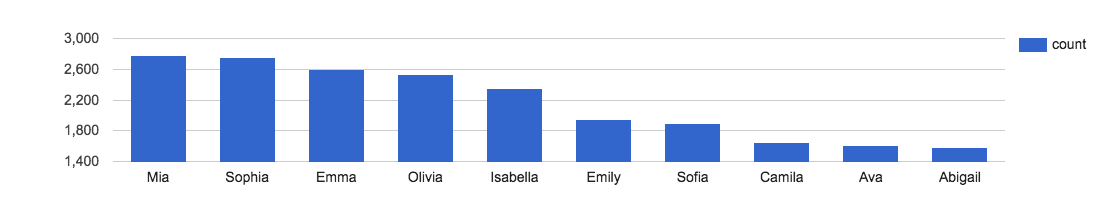

In [7]:
%chart columns --data popular_names --fields name,count

In [16]:
%%bq query --name count_by_state
SELECT
  state, SUM(count) as sum_count
FROM
  testdataset.names
GROUP BY
  1
ORDER BY
  2 DESC

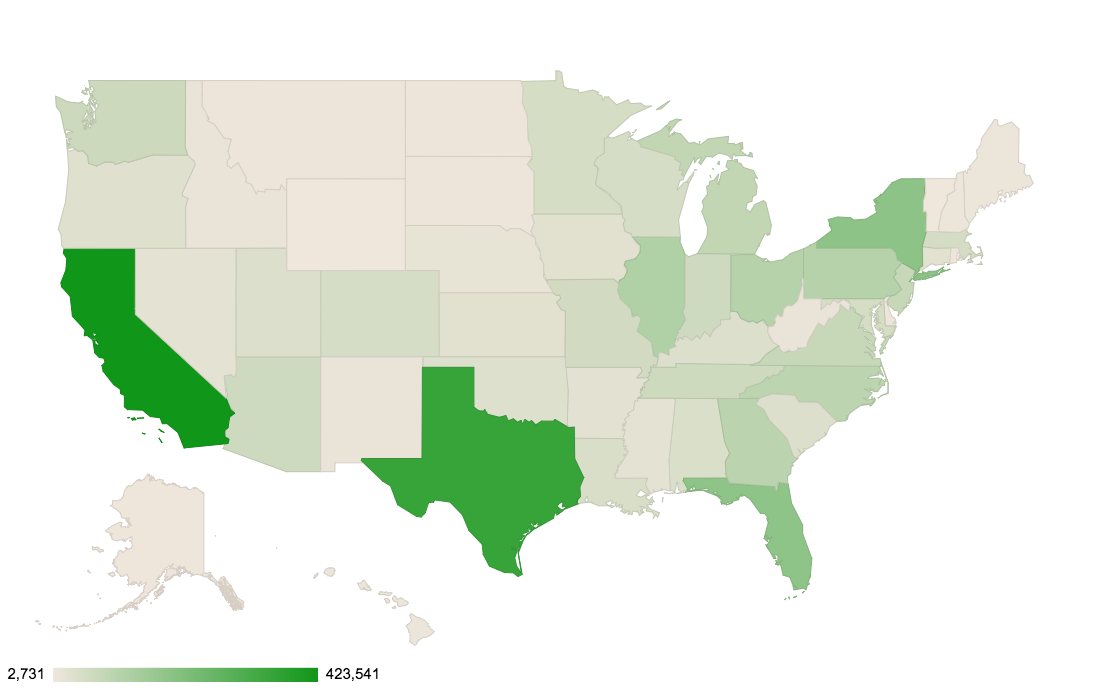

In [17]:
%chart geo --data count_by_state
{"region": "US", "resolution": "provinces"}

pandas DataFrameに読み込みます
<font color="red">**PROJECTID**を書き換えて実行してください</font>

In [1]:
import pandas as pd

query = """
SELECT
  name,count
FROM
  testdataset.names
WHERE
  state = 'CA' AND gender = 'F'
ORDER BY
  count DESC
LIMIT 5
"""

df_names = pd.read_gbq(project_id='PROJECTID', query=query)

Requesting query... ok.
Query running...
Query done.
Processed: 2.1 Mb

Retrieving results...
Got 5 rows.

Total time taken 1.7 s.
Finished at 2017-07-31 06:32:51.


pandas DataFrameからBigQueryに書き込みます
<font color="red">**PROJECTID**を書き換えて実行してください</font>

In [2]:
df_names.to_gbq(project_id='PROJECTID',
                destination_table='testdataset.names2')





Streaming Insert is 100% Complete


